# Perceptron Implementation

The implementation takes input as $X=[x_1^T,\ldots,x_n^T]\in\mathbb R^{n\times d}, y\in \{-1,1\}^n$, an initialization of the hyperplane parameters $\mathbf w\in \mathbb R^d$ and $b\in \mathbb R$, and the maximum number of passes of the training set (500).

It runs on the [spambase](https://archive.ics.uci.edu/ml/datasets/spambase) dataset.


In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import StandardScaler
import math

In [2]:
def perceptron(X, y, w, b, max_pass):
    '''
        Input: X is a n*d matrix, y = +- 1, w = 0, b = 0
        Output: w, b, mistake
    '''
    n = len(y)
    mis = np.zeros(max_pass)
    for t in range(max_pass):
        for i in range(n):
            # print(y[i], len(X[i]), len(w))
            p = y[i] * (np.dot(X[i], w) + b)
            if p <= 0:
                w += y[i] * X[i]
                b += y[i]
                mis[t] += 1
    return (w, b, mis)

We have implemented the perceptron algorithm as above. Now we run the algorithm on the spambase dataset and the number of mistakes.

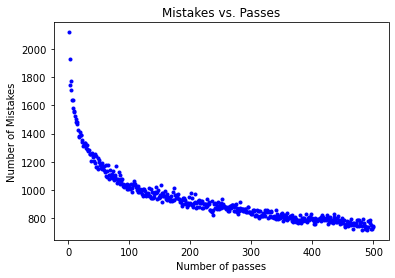

In [3]:
spambase_x = pd.read_csv("datasets/spambase_X.csv", header=None).transpose().to_numpy()
spambase_y = pd.read_csv("datasets/spambase_y.csv", header=None).to_numpy()
n = len(spambase_y)
d = len(spambase_x[0])
(w, b, mistake) = perceptron(spambase_x, spambase_y, [0 for _ in range(d)], 0, 500)
plt.plot(range(1, 501), mistake, 'b.')
plt.title("Mistakes vs. Passes")
plt.xlabel("Number of passes")
plt.ylabel("Number of Mistakes")
plt.show()